In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')

In [3]:
print(df.info())
print(df.shape[0]) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
541909


In [4]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

5268
0


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df = df.dropna(subset = ['CustomerID','Description'])
df = df[df['Revenue'] > 0]
df['CustomerID'] = df['CustomerID'].astype(str)




# Overview

<class 'pandas.core.series.Series'>
DatetimeIndex: 13 entries, 2010-12-31 to 2011-12-31
Freq: M
Series name: Revenue
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes
None


<function matplotlib.pyplot.show(close=None, block=None)>

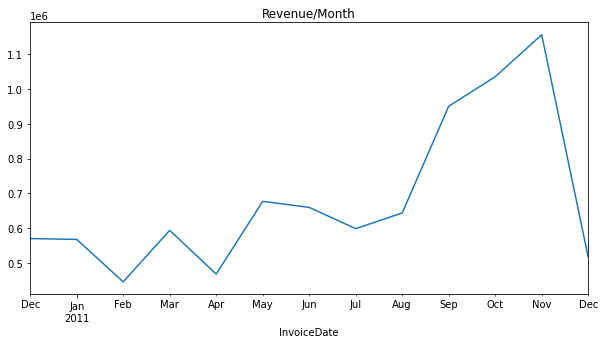

In [8]:
tren_revenue_bulan = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()
print(tren_revenue_bulan.info())

plt.figure(figsize=(10,5))
tren_revenue_bulan.plot(kind = 'line')
plt.title('Revenue/Month')
plt.show


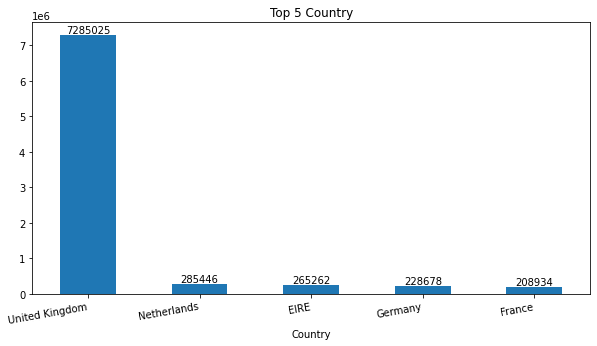

In [9]:
top_5_country = df.groupby('Country')['Revenue'].sum().nlargest(5)

ax = top_5_country.plot(kind='bar',figsize=(10,5))
plt.title ("Top 5 Country")
plt.xticks(rotation=10, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(p.get_x() + p.get_width() / 2., p.get_height() + 0.5), # Posisi y manual
                ha='center',
                va='bottom'
                )
    
plt.show()

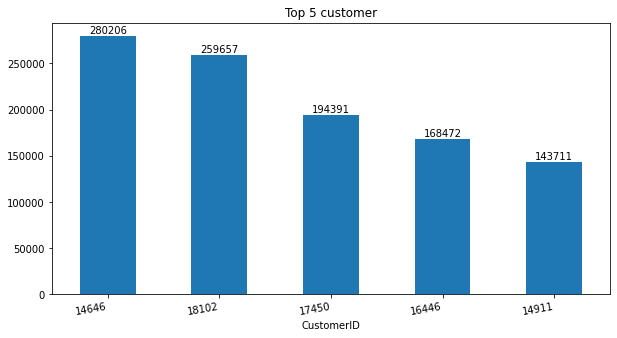

In [10]:
df['CustomerID'] = df['CustomerID'].str.slice(0, 5)

top_5_customer = df.groupby('CustomerID')['Revenue'].sum().nlargest(5)

ax = top_5_customer.plot(kind='bar',figsize=(10,5))
plt.title("Top 5 customer")
plt.xticks(rotation=10, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(p.get_x() + p.get_width() / 2., p.get_height() + 0.5), # Posisi y manual
                ha='center',
                va='bottom'
                )
    
plt.show()




613862.74
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Other              613862.740
dtype: float64


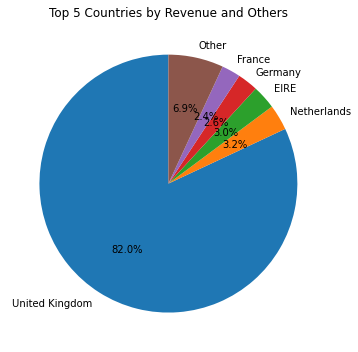

In [11]:
Top_country_by_revenue = df.groupby('Country')['Revenue'].sum()

top_5_countries = Top_country_by_revenue.nlargest(5)

# 3. Hitung total pendapatan dari semua negara di luar 5 teratas
other_revenue = Top_country_by_revenue.loc[~Top_country_by_revenue.index.isin(top_5_countries.index)].sum()

print(other_revenue)

# 4. Buat Series baru yang berisi 5 negara teratas dan 'Other'
top_5_and_other = pd.concat([top_5_countries, pd.Series([other_revenue], index=['Other'])])

print(top_5_and_other)

#print(top_5_and_other)

# 5. Buat pie chart dari Series baru ini
ax = top_5_and_other.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries by Revenue and Others')
plt.ylabel('')  # Hilangkan label 'Revenue' pada pie chart

plt.tight_layout()
plt.show()


InvoiceDate
2010-12-31    1400
2011-01-31     987
2011-02-28     997
2011-03-31    1321
2011-04-30    1149
2011-05-31    1555
2011-06-30    1393
2011-07-31    1331
2011-08-31    1280
2011-09-30    1755
2011-10-31    1929
2011-11-30    2657
2011-12-31     778
Freq: M, Name: InvoiceNo, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

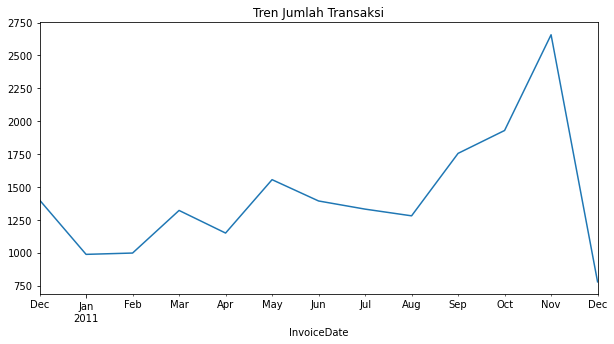

In [12]:
tren_transaksi_by_Invoice = df.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique()

print(tren_transaksi_by_Invoice)

plt.figure(figsize=(10,5))
tren_transaksi_by_Invoice.plot(kind = 'line')
plt.title("Tren Jumlah Transaksi")
plt.show


InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
2011-12-31     615
Freq: M, Name: CustomerID, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

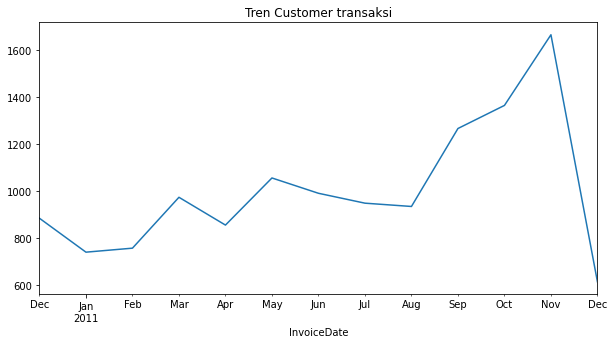

In [13]:
total_customer_transaksi = df.set_index('InvoiceDate').resample('M')['CustomerID'].nunique()
print(total_customer_transaksi)

plt.figure(figsize = (10,5))
total_customer_transaksi.plot(kind = 'line')
plt.title("Tren Customer transaksi")
plt.show

# Analisis Penjualan

In [14]:
revenue_day = df.set_index('InvoiceDate').resample('D')['Revenue'].sum()

total_revenue = df['Revenue'].sum()
print(revenue_day)
print(total_revenue)

InvoiceDate
2010-12-01     46192.49
2010-12-02     47197.57
2010-12-03     23876.63
2010-12-04         0.00
2010-12-05     31361.28
                ...    
2011-12-05     58081.09
2011-12-06     45989.66
2011-12-07     69230.60
2011-12-08     50395.96
2011-12-09    184329.66
Freq: D, Name: Revenue, Length: 374, dtype: float64
8887208.894


count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


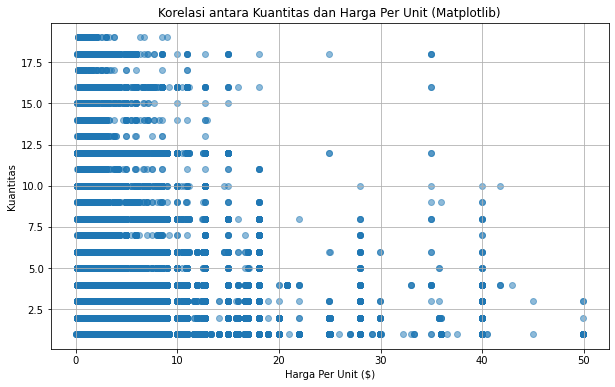

In [15]:
print(df['Quantity'].describe())
print(df['UnitPrice'].describe())


# Hapus outlier untuk visualisasi yang lebih jelas
df_clean = df[(df['Quantity'] < 20) & (df['UnitPrice'] < 50)]

plt.figure(figsize=(10, 6))

# Buat scatter plot
plt.scatter(x=df_clean['UnitPrice'], y=df_clean['Quantity'], alpha=0.5)

# Tambahkan judul dan label
plt.title('Korelasi antara Kuantitas dan Harga Per Unit (Matplotlib)')
plt.xlabel('Harga Per Unit ($)')
plt.ylabel('Kuantitas')
plt.grid(True)

plt.show()

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


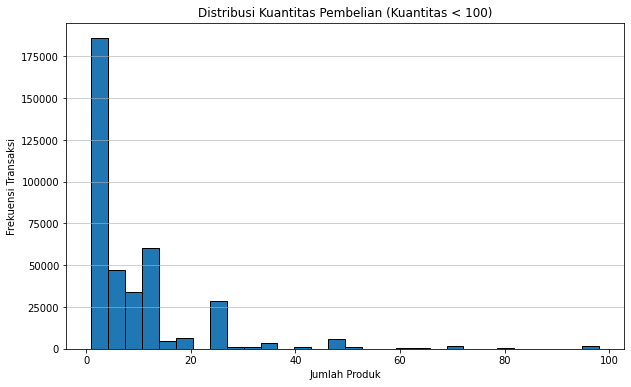

In [18]:
print(df['Quantity'].describe())

df_filtered = df[df['Quantity'] < 100]

# Buat histogram dari data yang sudah difilter
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Quantity'], bins=30, edgecolor='black')
plt.title('Distribusi Kuantitas Pembelian (Kuantitas < 100)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi Transaksi')
plt.grid(axis='y', alpha=0.75)
plt.show()

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  Revenue  

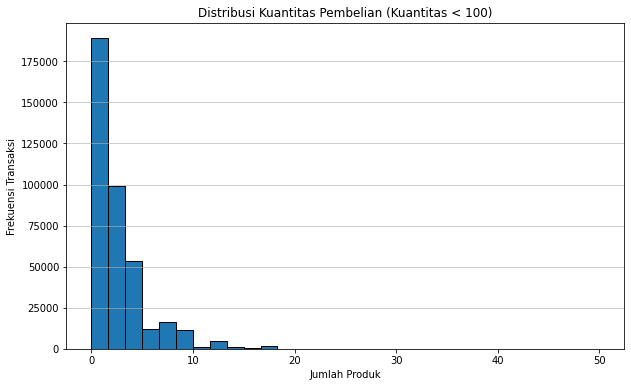

In [17]:
unitprice = df[df['UnitPrice'] < 50]
print(unitprice)
plt.figure(figsize=(10, 6))
plt.hist(unitprice['UnitPrice'], bins=30, edgecolor='black')
plt.title('Distribusi Kuantitas Pembelian (Kuantitas < 100)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi Transaksi')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
copy_data = df[['InvoiceDate','InvoiceNo','Quantity']].copy()

copy_data['InvoiceDate'] = copy_data['InvoiceDate'].dt.to_period('D')
#print(copy_data)
df_basket_size = copy_data.groupby('InvoiceDate').agg(InvoiceNo = ('InvoiceNo','unique'),BasketSize = ('Quantity','sum'))

print(df_basket_size)

                                                     InvoiceNo  BasketSize
InvoiceDate                                                               
2010-12-01   [536365, 536366, 536367, 536368, 536369, 53637...       24114
2010-12-02   [536598, 536599, 536600, 536601, 536602, 53660...       31077
2010-12-03   [536847, 536848, 536849, 536851, 536852, 53685...       11798
2010-12-05   [537037, 537038, 537040, 537041, 537042, 53704...       16241
2010-12-06   [537226, 537227, 537228, 537229, 537231, 53723...       16115
...                                                        ...         ...
2011-12-05   [580538, 580539, 580540, 580541, 580542, 58054...       38347
2011-12-06   [580733, 580734, 580735, 580736, 580737, 58073...       27736
2011-12-07   [581000, 581001, 581002, 581003, 581004, 58100...       41011
2011-12-08   [581214, 581215, 581216, 581218, 581220, 58122...       27476
2011-12-09   [581475, 581476, 581477, 581478, 581479, 58148...       90552

[305 rows x 2 columns]


InvoiceDate
2010-12-01     199.289256
2010-12-02     226.839416
2010-12-03     206.982456
2010-12-04       0.000000
2010-12-05     186.678161
                 ...     
2011-12-05     330.577586
2011-12-06     252.145455
2011-12-07     394.336538
2011-12-08     243.150442
2011-12-09    2208.585366
Freq: D, Name: BasketSize, Length: 374, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

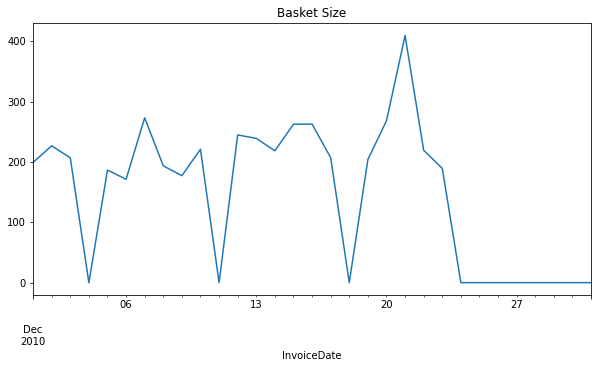

In [191]:
copy_data = df[['InvoiceDate','InvoiceNo','Quantity']].copy()
copy_data['InvoiceDate'] = copy_data['InvoiceDate'].dt.to_period('D')

df_basket_size = copy_data.groupby('InvoiceNo').agg(
    InvoiceDate=('InvoiceDate', 'first'),
    BasketSize=('Quantity', 'sum')
)

df_basket_size = df_basket_size.set_index('InvoiceDate').resample('D')['BasketSize'].mean()

df_basket_size = df_basket_size.fillna(0)

print(df_basket_size)

plt.figure(figsize = (10,5))
df_basket_size.loc['2010-12'].plot(kind = 'line')
plt.title("Basket Size")
plt.show




# Analisis customer dan country

2011-12-10 12:50:00
            Recency  Frequency  Monetary   R_Score   F_Score   M_Score
CustomerID                                                            
12346           326          1  77183.60  0.962425  0.000231  0.997925
12347             2          7   4310.00  0.021669  0.838866  0.923006
12348            75          4   1797.24  0.616644  0.653988  0.768787
12349            19          1   1757.55  0.259567  0.000461  0.763485
12350           310          1    334.40  0.946519  0.000692  0.286307
...             ...        ...       ...       ...       ...       ...
18280           278          1    180.60  0.919318  0.343937  0.131627
18281           181          1     80.82  0.802213  0.344168  0.023974
18282             8          2    178.05  0.134163  0.536653  0.127017
18283             4         16   2045.53  0.087367  0.965191  0.798755
18287            43          3   1837.28  0.463347  0.653757  0.774320

[4338 rows x 6 columns]
Jumlah Pelanggan per Segmen RFM:

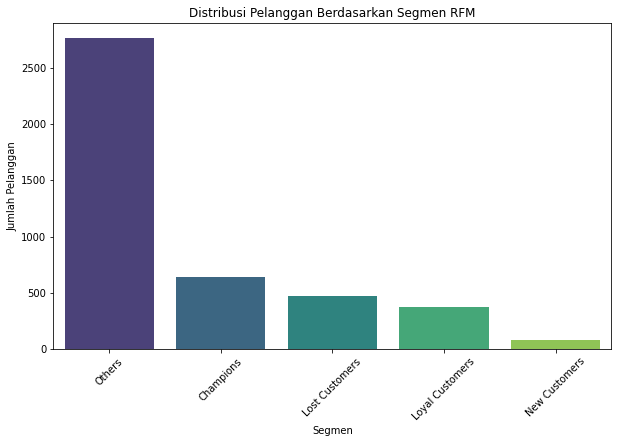

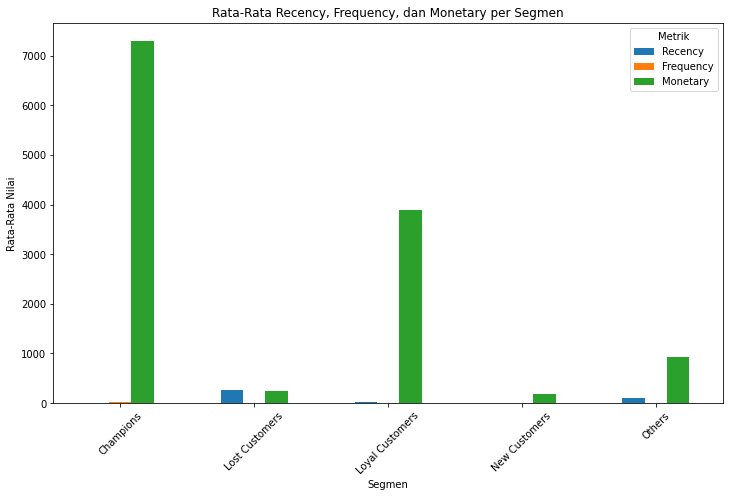

In [21]:
import numpy as np
import seaborn as sns


# Tentukan "hari ini" sebagai tanggal maksimum dalam dataset + 1 hari
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

print(snapshot_date)

# Kelompokkan data berdasarkan CustomerID dan hitung RFM
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique', # Frequency
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum() # Monetary
})

# Ganti nama kolom
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)


# Buat skor RFM
# Hitung nilai persentil (rank) untuk setiap kolom RFM
rfm_df['R_Score'] = rfm_df['Recency'].rank(method='first', pct=True)
rfm_df['F_Score'] = rfm_df['Frequency'].rank(method='first', pct=True)
rfm_df['M_Score'] = rfm_df['Monetary'].rank(method='first', pct=True)

print(rfm_df)

# Beri skor 1 sampai 4 berdasarkan persentil
rfm_df['R_Score'] = np.where(rfm_df['R_Score'] <= 0.25, 4,
                            np.where(rfm_df['R_Score'] <= 0.50, 3,
                                     np.where(rfm_df['R_Score'] <= 0.75, 2, 1)))

rfm_df['F_Score'] = np.where(rfm_df['F_Score'] <= 0.25, 1,
                            np.where(rfm_df['F_Score'] <= 0.50, 2,
                                     np.where(rfm_df['F_Score'] <= 0.75, 3, 4)))

rfm_df['M_Score'] = np.where(rfm_df['M_Score'] <= 0.25, 1,
                            np.where(rfm_df['M_Score'] <= 0.50, 2,
                                     np.where(rfm_df['M_Score'] <= 0.75, 3, 4)))

# Gabungkan skor untuk mendapatkan RFM_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def rfm_segment(rfm_score):
    if rfm_score in ['444', '434', '443']:
        return 'Champions'
    elif rfm_score in ['421', '411']:
        return 'New Customers'
    elif rfm_score in ['334', '344', '343']:
        return 'Loyal Customers'
    # Tambahkan segmen lain sesuai kebutuhan
    elif rfm_score in ['111', '112']:
        return 'Lost Customers'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Lihat jumlah pelanggan di setiap segmen
segment_counts = rfm_df['Segment'].value_counts()
print("Jumlah Pelanggan per Segmen RFM:")
print(segment_counts)

# Hitung rata-rata Recency, Frequency, dan Monetary per segmen
segment_metrics = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print("\nRata-rata RFM per Segmen:")
print(segment_metrics)

# Grafik batang untuk jumlah pelanggan per segmen
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='Segment', hue='Segment', palette='viridis', order=rfm_df['Segment'].value_counts().index, legend=False)
plt.title('Distribusi Pelanggan Berdasarkan Segmen RFM')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

# Grafik untuk membandingkan rata-rata RFM per segmen
segment_metrics = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

segment_metrics.plot(kind='bar', figsize=(12, 7))
plt.title('Rata-Rata Recency, Frequency, dan Monetary per Segmen')
plt.xlabel('Segmen')
plt.ylabel('Rata-Rata Nilai')
plt.xticks(rotation=45)
plt.legend(title='Metrik')
plt.show()

     CustomerID         InvoiceDate
0         12346 2011-01-18 10:01:00
1         12347 2010-12-07 14:57:00
2         12348 2010-12-16 19:09:00
3         12349 2011-11-21 09:51:00
4         12350 2011-02-02 16:01:00
...         ...                 ...
4333      18280 2011-03-07 09:52:00
4334      18281 2011-06-12 10:53:00
4335      18282 2011-08-05 13:35:00
4336      18283 2011-01-06 14:14:00
4337      18287 2011-05-22 10:39:00

[4338 rows x 2 columns]
Pelanggan Baru per Bulan:
RegistrationMonth
2010-12    885
2011-01    417
2011-02    380
2011-03    452
2011-04    300
2011-05    284
2011-06    242
2011-07    188
2011-08    169
2011-09    299
2011-10    358
2011-11    323
2011-12     41
Freq: M, Name: CustomerID, dtype: int64


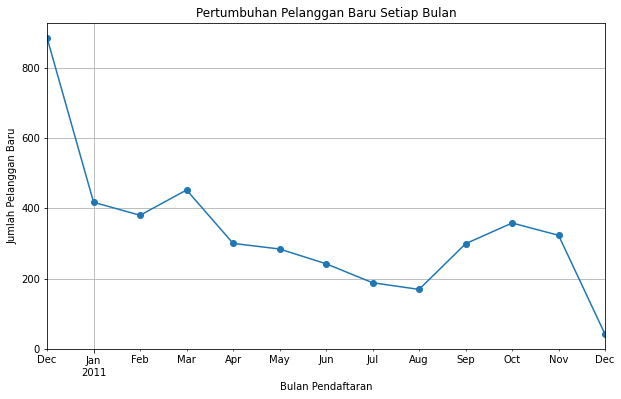

In [62]:
# Asumsi: df adalah DataFrame Anda dengan kolom 'InvoiceDate' dan 'CustomerID'
# Pastikan 'InvoiceDate' adalah tipe data datetime

# 1. Temukan tanggal pembelian pertama untuk setiap pelanggan
df_first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
print(df_first_purchase)

# 2. Ekstrak bulan dan tahun dari tanggal pembelian pertama
df_first_purchase['RegistrationMonth'] = df_first_purchase['InvoiceDate'].dt.to_period('M')



# 3. Hitung jumlah pelanggan baru per bulan
monthly_new_customers = df_first_purchase.set_index('RegistrationMonth').resample('M')['CustomerID'].count()

# Tampilkan hasilnya
print("Pelanggan Baru per Bulan:")
print(monthly_new_customers)

# Visualisasikan trennya
plt.figure(figsize=(10, 6))
monthly_new_customers.plot(kind='line', marker='o')
plt.title('Pertumbuhan Pelanggan Baru Setiap Bulan')
plt.xlabel('Bulan Pendaftaran')
plt.ylabel('Jumlah Pelanggan Baru')
plt.grid(True)
plt.show()

     CustomerID         InvoiceDate InvoiceMonth
0         12346 2011-01-18 10:01:00      2011-01
1         12347 2011-12-07 15:52:00      2011-12
2         12348 2011-09-25 13:13:00      2011-09
3         12349 2011-11-21 09:51:00      2011-11
4         12350 2011-02-02 16:01:00      2011-02
...         ...                 ...          ...
4333      18280 2011-03-07 09:52:00      2011-03
4334      18281 2011-06-12 10:53:00      2011-06
4335      18282 2011-12-02 11:43:00      2011-12
4336      18283 2011-12-06 12:02:00      2011-12
4337      18287 2011-10-28 09:29:00      2011-10

[4338 rows x 3 columns]
InvoiceMonth
2010-12     119
2011-01      95
2011-02     108
2011-03     167
2011-04     137
2011-05     165
2011-06     181
2011-07     178
2011-08     215
2011-09     413
2011-10     652
2011-11    1293
2011-12     615
Freq: M, Name: CustomerID, dtype: int64


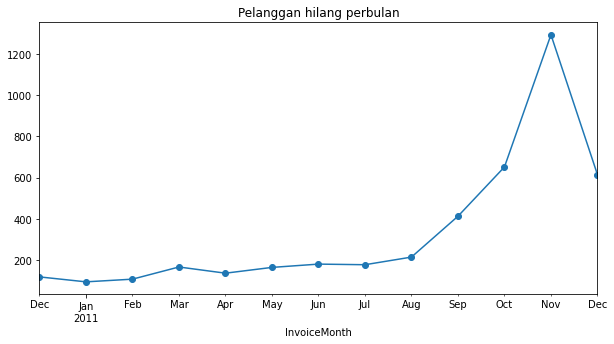

In [165]:
from datetime import date
data_last_transaksi = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

data_last_transaksi['InvoiceMonth'] = data_last_transaksi['InvoiceDate'].dt.to_period('M')

jumlah_customer = data_last_transaksi.groupby('InvoiceMonth')['CustomerID'].nunique()

print(data_last_transaksi)
print(jumlah_customer)

plt.figure(figsize = (10,5))
jumlah_customer.plot(kind = 'line',marker = 'o')
plt.title('Pelanggan hilang perbulan')
plt.show()




<class 'pandas.core.series.Series'>
Index: 5 entries, United Kingdom to Belgium
Series name: CustomerID
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes
None


<function matplotlib.pyplot.show(close=None, block=None)>

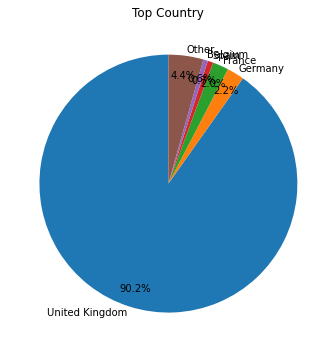

In [186]:
customer_country = df.groupby('Country')['CustomerID'].nunique()

top_customer_country = customer_country.nlargest(5)

print(top_customer_country.info())

other_country = customer_country.loc[~customer_country.index.isin(top_customer_country.index)].sum()

fix_customer_country = pd.concat([top_customer_country, pd.Series([other_country],index=['Other'])])

ax = fix_customer_country.plot(
    kind='pie',
    figsize=(10, 5),
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85, # Mengatur jarak persentase
    labeldistance=1.05 # Mengatur jarak label
)
plt.title('Top Country')
plt.tight_layout()
plt.show


In [187]:
df.to_csv('data_output.csv', index=False)


In [190]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 38.0+ MB
None
